<a href="https://colab.research.google.com/github/RealG11/Data-Science/blob/main/Copy_of_Stock_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#Import the libraries
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [52]:
#Get the data
df = web.DataReader('CPI.JO',data_source='yahoo', start='2009-01-01', end='2020-12-11')
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,2738.959961,2738.959961,2738.959961,2738.959961,589.0,2146.750488
2009-01-05,2786.179932,2738.959961,2738.959961,2743.679932,37906.0,2150.449707
2009-01-06,2786.179932,2762.570068,2762.570068,2786.179932,9794.0,2183.760010
2009-01-07,2838.129883,2833.409912,2833.409912,2833.409912,6670.0,2220.778809
2009-01-08,2927.850098,2786.179932,2786.179932,2927.850098,2202.0,2294.799561
2009-01-09,2927.850098,2880.629883,2927.850098,2927.850098,18923.0,2294.799561
2009-01-12,2927.850098,2861.739990,2927.850098,2923.129883,8192.0,2291.099854
2009-01-13,2852.290039,2833.409912,2852.290039,2833.409912,335984.0,2220.778809
2009-01-14,2842.850098,2833.409912,2842.850098,2833.409912,962883.0,2220.778809


In [53]:
df.shape

(3072, 6)

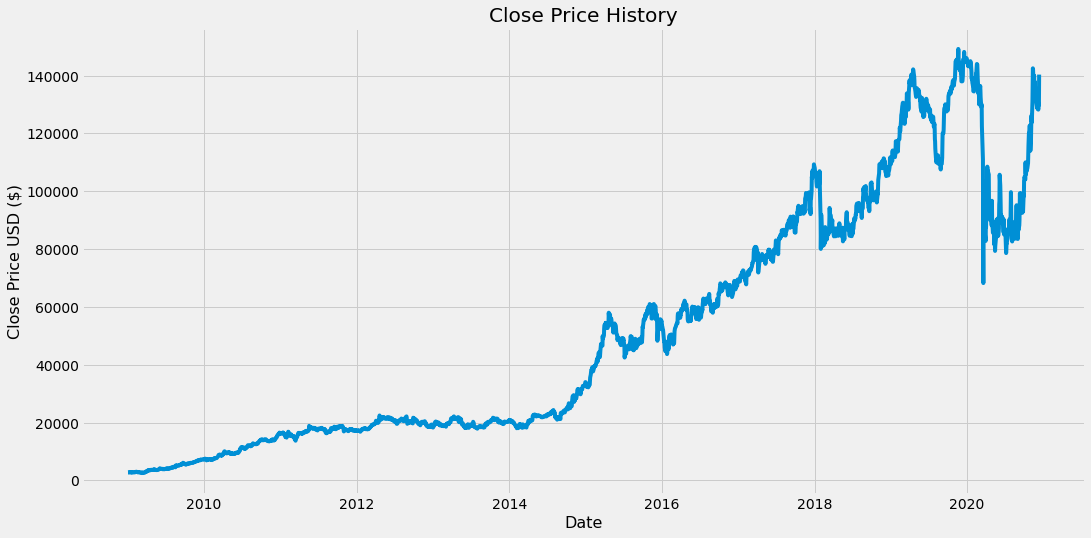

In [54]:
#visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.show()

In [55]:
#create new dataframe with only the 'Close' colomn
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2458

In [56]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0012881 ],
       [0.00132029],
       [0.00161009],
       ...,
       [0.87176947],
       [0.86768491],
       [0.93952947]])

In [57]:
#Create training dataset and scaled training dataset
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
   print(x_train)
   print(y_train)
   print()

[array([0.0012881 , 0.00132029, 0.00161009, 0.00193215, 0.00257613,
       0.00257613, 0.00254395, 0.00193215, 0.00193215, 0.00135247,
       0.00135247, 0.00193215, 0.00193215, 0.00186771, 0.00186771,
       0.00097252, 0.00141691, 0.00141691, 0.00193215, 0.00193215,
       0.00193215, 0.00193215, 0.00225414, 0.00193215, 0.00193215,
       0.00257613, 0.00322019, 0.00322019, 0.00289819, 0.00289819,
       0.00289171, 0.00257613, 0.00193215, 0.00161009, 0.00193215,
       0.00193215, 0.00161009, 0.00225414, 0.00225414, 0.00257613,
       0.00193856, 0.0012881 , 0.0012881 , 0.0012881 , 0.0012881 ,
       0.00096611, 0.00096611, 0.        , 0.00125592, 0.00080505,
       0.00064405, 0.00103048, 0.00064405, 0.00064405, 0.00090167,
       0.00038643, 0.00096611, 0.00161009, 0.00192567, 0.00321371])]
[0.0030270037088780156]



In [58]:
#convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [59]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [60]:
x_train.shape

(2398, 60, 1)

In [61]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [62]:
#Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2398/2398 [==============================] - 56s 22ms/step - loss: 0.0023
Epoch 2/3
2398/2398 [==============================] - 54s 23ms/step - loss: 3.2425e-04
Epoch 3/3
2398/2398 [==============================] - 54s 22ms/step - loss: 2.9643e-04


In [64]:
#Create testing dataset
test_data = scaled_data[training_data_len-60:, :]
#Create data sets
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [65]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [66]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [67]:
#Get the predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [68]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt((np.mean(predictions - y_test)**2))
rmse

321.75085250407164

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


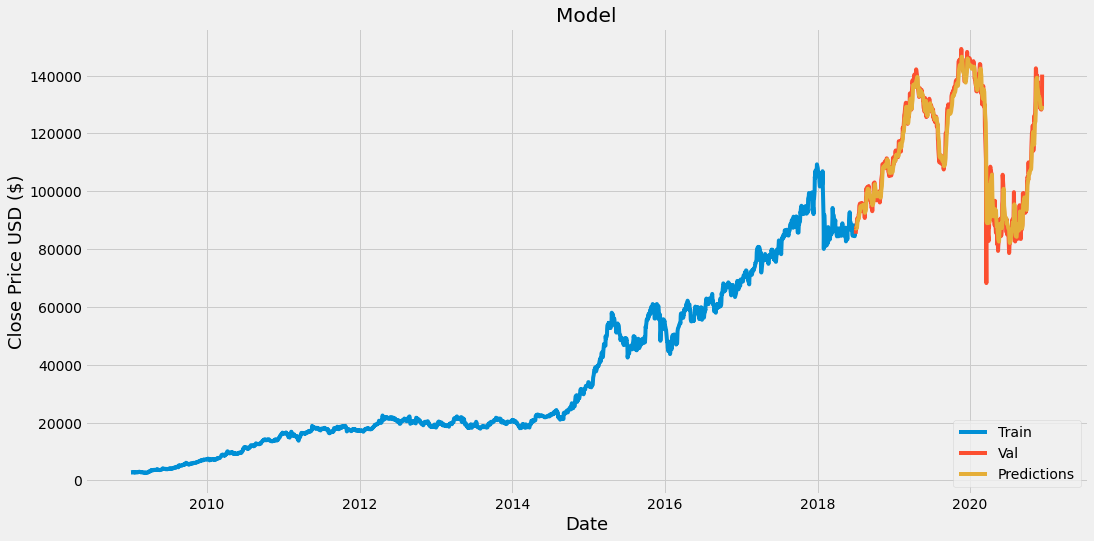

In [69]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [70]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-03,85300.0,87218.679688
2018-07-04,87375.0,87094.859375
2018-07-05,87000.0,87323.468750
2018-07-06,87000.0,87436.828125
2018-07-09,90000.0,87476.796875
...,...,...
2020-12-07,128220.0,128868.906250
2020-12-08,128555.0,128618.484375
2020-12-09,130395.0,128537.171875
